# Modis Vegetation Index - Continued

Today, we continue to look into Modis data and you get to do all the work. 

### Task 1: Import all the modules that we need

In [28]:
# you can insert cells with the plus on the top (or with <ESC> + b )

import matplotlib.pyplot as plt #plotting library 
import numpy as np #numerical library 
import xarray as xr #netcdf library
import cartopy #map projections library 
import cartopy.crs as ccrs # projections list 
import glob



### Task 2: Load the MODIS Vegetation Index Dataset

#### Task 2.1:

Before you load the dataset, use `glob` to see what files are now located in the _data_-folder and only load the Vegetation Index dataset. 

In [29]:
files = glob.glob(r'../data/*1km_*latlon_*10km.nc')
files

['../data/MOD13A3.061_1km_aid0001_latlon_2022_10km.nc',
 '../data/MOD13A3.061_1km_aid0001_latlon_2023_10km.nc',
 '../data/MOD13A3.061_1km_aid0001_latlon_2021_10km.nc',
 '../data/MOD13A3.061_1km_aid0001_latlon_2020_10km.nc']

In [30]:
#xr.open_dataset('../data\\MOD13A3.061_1km_aid0001_latlon_2022_10km.nc)
xr.open_dataset(files[3])

<xarray.Dataset> Size: 176MB
Dimensions:                               (time: 12, lat: 357, lon: 790)
Coordinates:
  * time                                  (time) object 96B 2020-01-01 00:00:...
  * lat                                   (lat) float64 3kB 50.81 ... 21.14
  * lon                                   (lon) float64 6kB -128.9 ... -63.13
Data variables:
    crs                                   int8 1B ...
    _1_km_monthly_EVI                     (time, lat, lon) float32 14MB ...
    _1_km_monthly_MIR_reflectance         (time, lat, lon) float32 14MB ...
    _1_km_monthly_NDVI                    (time, lat, lon) float32 14MB ...
    _1_km_monthly_NIR_reflectance         (time, lat, lon) float32 14MB ...
    _1_km_monthly_VI_Quality              (time, lat, lon) float64 27MB ...
    _1_km_monthly_blue_reflectance        (time, lat, lon) float32 14MB ...
    _1_km_monthly_pixel_reliability       (time, lat, lon) float64 27MB ...
    _1_km_monthly_red_reflectance         (time, lat, lon) float32 14MB ...
    _1_km_monthly_relative_azimuth_angle  (time, lat, lon) float32 14MB ...
    _1_km_monthly_sun_zenith_angle        (time, lat, lon) float32 14MB ...
    _1_km_monthly_view_zenith_angle       (time, lat, lon) float32 14MB ...
Attributes:
    title:        MOD13A3.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.48
    references:   See README.md
    history:      See README.md

In [31]:
ds =  xr.open_mfdataset(r'../data/*1km_*latlon_*10km.nc')
ds['time'] = ds.indexes['time'].to_datetimeindex()  # xarray has a small problem with the time index in the original form. This fixes it. 
ds

/var/folders/f9/j3z2tsg90zv180m3x5l5x6gc0000gn/T/ipykernel_3011/3303226973.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex()  # xarray has a small problem with the time index in the original form. This fixes it.


<xarray.Dataset> Size: 704MB
Dimensions:                               (time: 48, lat: 357, lon: 790)
Coordinates:
  * time                                  (time) datetime64[ns] 384B 2020-01-...
  * lat                                   (lat) float64 3kB 50.81 ... 21.14
  * lon                                   (lon) float64 6kB -128.9 ... -63.13
Data variables:
    crs                                   (time) int8 48B -127 -127 ... -127
    _1_km_monthly_EVI                     (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_MIR_reflectance         (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_NDVI                    (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_NIR_reflectance         (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_VI_Quality              (time, lat, lon) float64 108MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_blue_reflectance        (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_pixel_reliability       (time, lat, lon) float64 108MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_red_reflectance         (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_relative_azimuth_angle  (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_sun_zenith_angle        (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
    _1_km_monthly_view_zenith_angle       (time, lat, lon) float32 54MB dask.array<chunksize=(12, 357, 790), meta=np.ndarray>
Attributes:
    title:        MOD13A3.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.48
    references:   See README.md
    history:      See README.md

### Task 3: Make a plot for EVI

#### Task 3.1: Save EVI as a new dataset

Inspect the dataset to indentify the variable name for EVI

In [33]:
#select EVI
EVI = ds['_1_km_monthly_EVI']  
EVI

<xarray.DataArray '_1_km_monthly_EVI' (time: 48, lat: 357, lon: 790)> Size: 54MB
dask.array<concatenate, shape=(48, 357, 790), dtype=float32, chunksize=(12, 357, 790), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 384B 2020-01-01 2020-02-01 ... 2023-12-01
  * lat      (lat) float64 3kB 50.81 50.72 50.64 50.56 ... 21.31 21.22 21.14
  * lon      (lon) float64 6kB -128.9 -128.8 -128.7 ... -63.3 -63.22 -63.13
Attributes:
    grid_mapping:      crs
    valid_min:         -2000
    valid_max:         10000
    long_name:         1 km monthly EVI
    units:             EVI
    scale_factor_err:  0.0
    add_offset_err:    0.0
    calibrated_nt:     5

#### Task 3.2: Plot a map/ maps of EVI

Decide on how the plot should look like. Maybe you want to switch up the colormap (`cmap=`). All available maps are found [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html#overview).


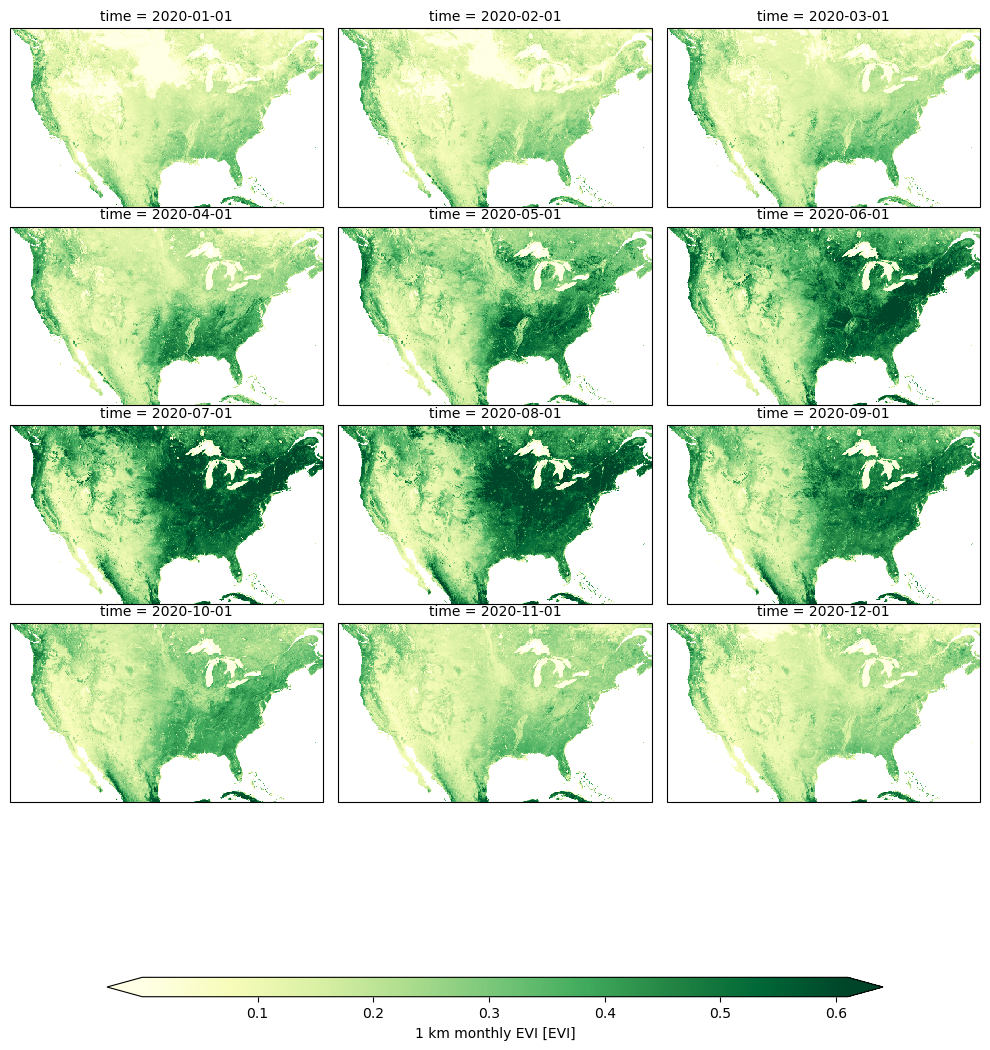

In [38]:
# plot EVI 

fig = EVI.sel(time = slice ('2020-01-01', '2020-12-31')).plot(col ="time", 
                                                              col_wrap = 3, 
                                                              transform = ccrs.PlateCarree (), 
                                                              subplot_kws = {"projection":ccrs.Mercator()}, 
                                                              cmap = 'YlGn', 
                                                              robust=True, 
                                                              cbar_kwargs = {"orientation":"horizontal", "shrink":0.8, "aspect":40}, 
                                                             )

### Task 4: Calculate EVI using the MODIS bands 

The [Enhanced Vegetation Index (EVI)](https://en.wikipedia.org/wiki/Enhanced_vegetation_index) is another popular vegetation index, that has some advantages over the NDVI. It is designed to "enhance the vegetation signal with improved sensitivity in high biomass regions and improved vegetation [...] and to reduce atmospheric influences".  

EVI is calculated as:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/200b046072bcb150ccc8dae9d5d2b9d4880f0597)

where:

-   NIR, Red, and Blue are atmospherically-corrected and partially atmosphere-corrected (Rayleigh and ozone absorption) surface reflectanc
-    L is the canopy background adjustment that addresses non-linear, differential NIR and red radiant transfer through a cano
- C1, C2 are the coefficients of the aerosol resistance term, which uses the blue band to correct for aerosol influences in the red band
- 
    G is a gain factor.

The coefficients adopted in the MODIS-EVI algorithm are: L=1, C1 = 6, C2 = 7.5, and G = 2.5. 

#### Task 4.1: Calculate EVI using the relevant MODIS bands 

#### Task 4.2: Compare your calculated EVI to the MODIS EVI product

#### Task 5: Investigate the correlation between EVI and NDVI

(Hint: `xr.corr(<dataArray1>,<dataArray2>,dim = 'time')` will calculate the correlation along the time dimension.)
[`xaray.corr()` documentation](https://docs.xarray.dev/en/stable/generated/xarray.corr.html)

You can add several dimensions as a list (`dim = ['time', ...]`)

### Task 6: The _other_ MODIS dataset

You may have noticed before that another Modis dataset was added to the data folder. Load the dataset and try to find out what data it contains. 

(Hint: An overview of MODIS Land data products is found [here](https://ladsweb.modaps.eosdis.nasa.gov/#land). You can also google the dataset identifyer in the filenames, which starts with `MOD16`. 

#### Task 5.1: Load the dataset and inspect variables and dimensions. 

What are similarties and differences when looking at the data structure. 

Feel free to create more plots. 

### Task 7: Drought Challenge

Here is some information about [Evapotranspiration](https://www.nasa.gov/missions/landsat/evapotranspiration-watching-over-water-use/)

How would you expect evapotranspiration to behave during drought? 

Discuss with your team on how to investigate this using the skills you have learned. 

(Hint: A useful tool can be the [Evaporative Stress Ratio (ESR)](https://www.drought.gov/data-maps-tools/evaporative-stress-index-esi), which is the ratio between Evapotranspiration and Potential Evapotranspiration:

$ESR = \frac{ET}{PET}$
